# Data Collecting

In [ ]:
# Library for Data Analysis
import pandas as pd
import numpy as np

# Library for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Library for Scaling Data
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler

# Library for Creating Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Import Data from Spreadsheet

In [ ]:
df = pd.read_excel("https://docs.google.com/spreadsheets/d/1vS-HnK4E9ykaMyL-zfH3esbVd-OuvAbUE1YqLxjtfeA/export?gid=0&format=xlsx")

In [ ]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-02-01 00:00:00,1447.16,84.86,78.47,15.180,1.471692
1,2008-03-01 00:00:00,1447.16,85.57,78.37,15.285,1.474491
2,2008-04-01 00:00:00,1411.63,85.13,77.31,15.167,1.475492
3,2008-07-01 00:00:00,1416.18,84.77,75.50,15.053,1.468299
4,2008-08-01 00:00:00,1390.19,86.78,76.06,15.590,1.557099


In [ ]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315777,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530000,70.000000,7.960000,8.850000,1.039047
25%,1239.875000,109.725000,14.380000,15.570000,1.171313
50%,1551.435000,120.580000,33.870000,17.268500,1.303297
75%,2073.010000,132.840000,37.827500,22.882500,1.369971
max,2872.870000,184.590000,117.480000,47.260000,1.598798


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


# Data Cleaning

### Missing Value Analysis

In [ ]:
df.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

### Data Duplicate Analysis

In [ ]:
df.duplicated(keep=False).sum()

0

### Cleaning Outliers

Outlier Detection using Boxplot

<Axes: >

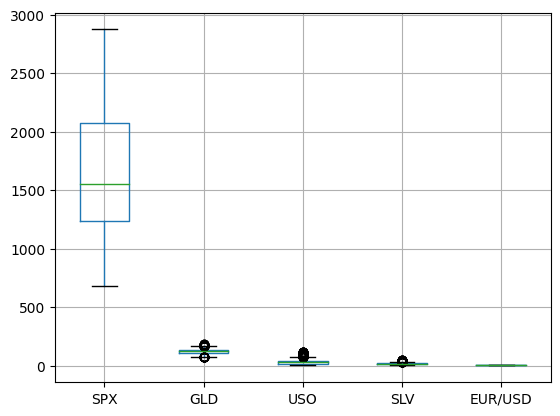

In [ ]:
df.boxplot()

Outlier Detection Function

In [ ]:
def outlier(column):
  Q1 = np.percentile(column, 25)
  Q3 = np.percentile(column, 75)

  IQR = Q3 - Q1

  IQR_min = Q1 - (1.5 * IQR)
  IQR_max = Q3 + (1.5 * IQR)

  outlier = []
  for x in column:
    if (x < IQR_min or x > IQR_max):
        outlier.append(x)

  return outlier

Outlier Cleaning Functioin

In [ ]:
def clean_outlier(df, column):
  Q1 = np.percentile(df[column], 25)
  Q3 = np.percentile(df[column], 75)

  IQR = Q3 - Q1

  IQR_min = Q1 - (1.5 * IQR)
  IQR_max = Q3 + (1.5 * IQR)

  return df.loc[(df[column] >= IQR_min) & (df[column] <= IQR_max)]

Calculate The Amount of Data that is Indicated as An Outlier

In [ ]:
print("Data outlier from column 'USO': ",len(outlier(df['USO'])))
print("Data outlier from column 'SLV': ",len(outlier(df['SLV'])))
print("Data outlier from column 'EUR/USD': ",len(outlier(df['EUR/USD'])))
print("Data outlier from column 'GLD': ",len(outlier(df['GLD'])))

Data outlier from column 'USO':  134
Data outlier from column 'SLV':  117
Data outlier from column 'EUR/USD':  0
Data outlier from column 'GLD':  115


Cleaning Outlier from Each Columns

In [ ]:
old_length = len(df)
df = clean_outlier(df, "USO")
df = clean_outlier(df, "SLV")
df = clean_outlier(df, "EUR/USD")
df = clean_outlier(df, "GLD")
new_length = len(df)
print(f"Amount of Data Decreasing from %d to %d" % (old_length, new_length))

Amount of Data Decreasing from 2290 to 1994


# Data Visualization

### Data Distribution

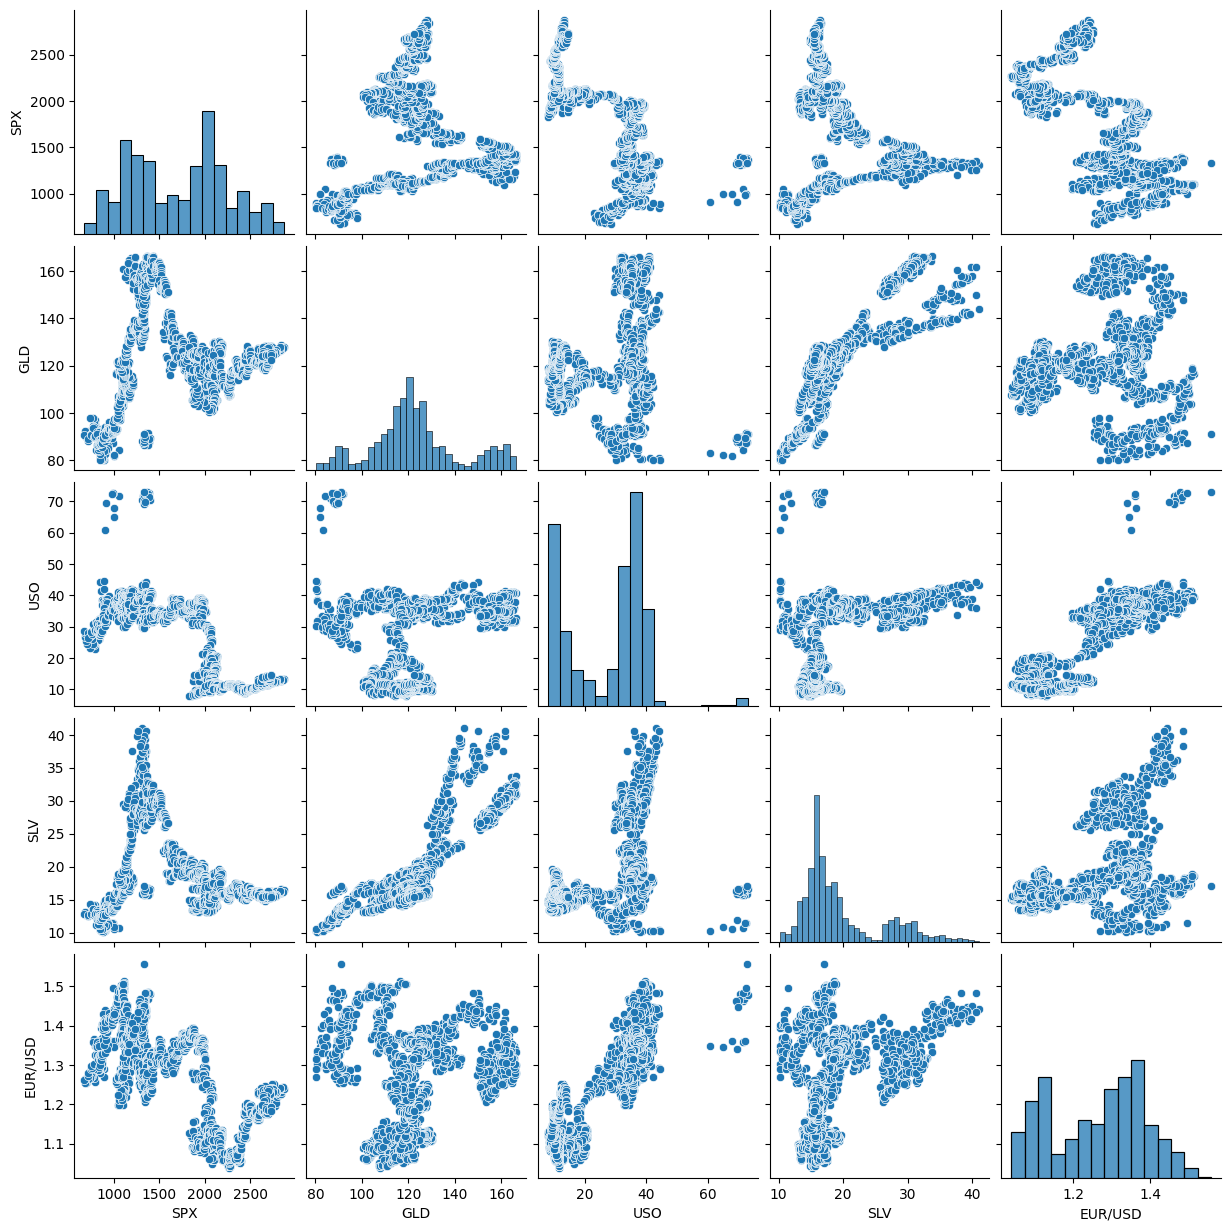

In [ ]:
sns.pairplot(df)

### Data Correlation

<ipython-input-14-167911731698>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data = df.corr()


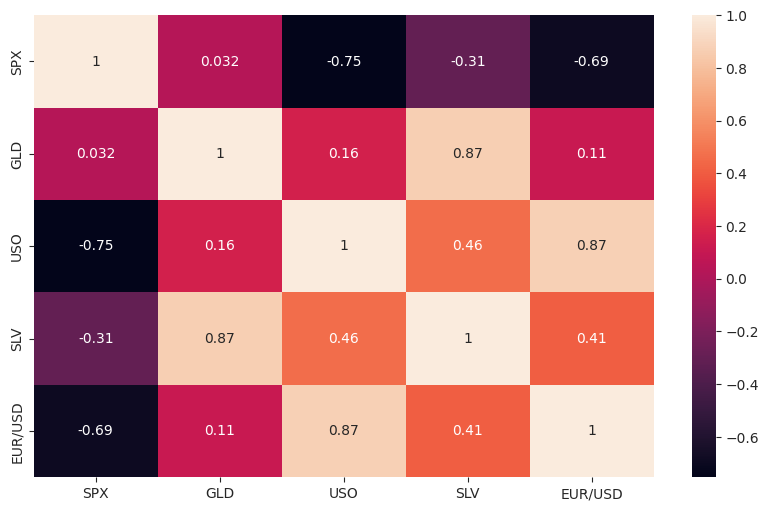

In [ ]:
corr_data = df.corr()
plt.figure(figsize=(10,6))
sns.set_style('ticks')

sns.heatmap(corr_data, annot=True)
plt.show()

# Data Preprocessing

### Standarization Data

In [ ]:
scaler = StandardScaler()

In [ ]:
# Single
X_single = scaler.fit_transform(df['SLV'].values.reshape(-1, 1))

# Quadratic X
X_quadratic = df['SLV']
X_quadratic = pd.DataFrame(X_quadratic)
X_quadratic['SLV2'] = X_quadratic['SLV']**2
X_quadratic['SLV3'] = X_quadratic['SLV']**3
quadratic_column = X_quadratic.columns
X_quadratic = scaler.fit_transform(X_quadratic)

# Multi
features=df.drop(['GLD', 'Date'], axis=1)
X_mult=scaler.fit_transform(features)
mult_column=features.columns

y = df['GLD']

# Single Variable

### Feature selection = "SLV"

<Axes: xlabel='SLV', ylabel='GLD'>

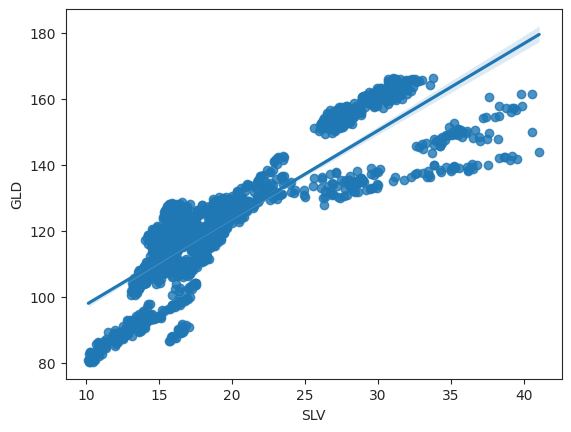

In [ ]:
sns.regplot(x='SLV', y='GLD', data=df)

### Split Data

In [ ]:
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(X_single,
                                                                                y,
                                                                                test_size=0.2,
                                                                                random_state=50,
                                                                                )

In [ ]:
X_train_single.shape

(1595, 1)

In [ ]:
X_test_single.shape

(399, 1)

### Data Training

In [ ]:
regressor_single = LinearRegression()
regressor_single.fit(X_train_single, y_train_single)

LinearRegression()

In [ ]:
print("Intercept dari persamaan yang didapat adalah = %f" % regressor_single.intercept_)
print("Coefisien dari persamaan yang didapat adalah = %f" % regressor_single.coef_)

Intercept dari persamaan yang didapat adalah = 122.756731
Coefisien dari persamaan yang didapat adalah = 16.457768


### Data Testing

In [ ]:
y_pred_train_single = regressor_single.predict(X_train_single)
y_pred_test_single = regressor_single.predict(X_test_single)

In [ ]:
regressor_single.score(X_train_single, y_train_single)

0.7518572826179963

In [ ]:
regressor_single.score(X_test_single, y_test_single)

0.7374414778887874

### Comparison Result

In [ ]:
prediksi_single=pd.DataFrame({'Y Actual': y_test_single, 'Y Predicted': y_pred_test_single})
prediksi_single.head()

,Y Actual,Y Predicted
2033,114.12,113.416791
1311,115.57,120.591751
766,147.18,160.776787
1253,127.55,126.005824
1124,159.89,150.474280


<ipython-input-27-98eae17821bd>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


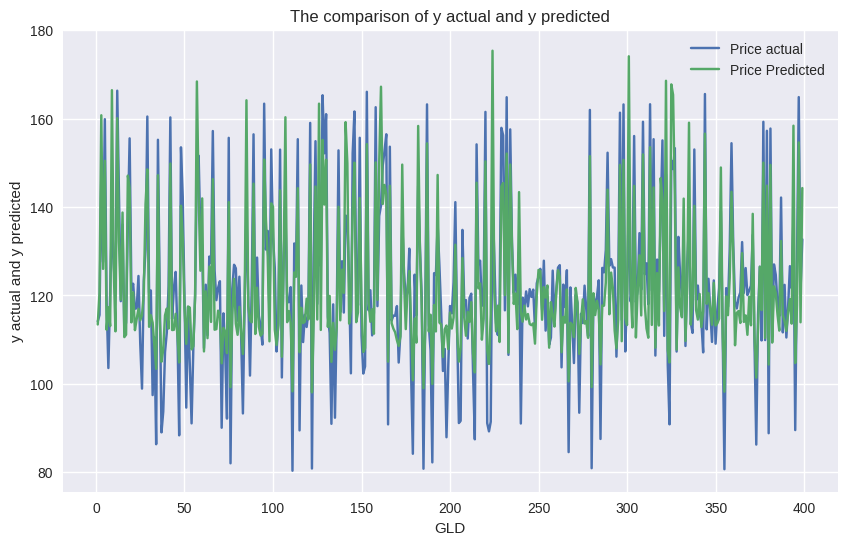

In [ ]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(np.arange(1,X_test_single.shape[0]+1,1), prediksi_single['Y Actual'], label='Price actual')
ax.plot(np.arange(1,X_test_single.shape[0]+1,1), prediksi_single['Y Predicted'], label='Price Predicted')
ax.set_title('The comparison of y actual and y predicted')
ax.set_ylabel('y actual and y predicted')
ax.set_xlabel('GLD')
ax.legend()

plt.show()

### Metrics Error

Train

In [ ]:
print('Mean Absolute Error(MAE): ', metrics.mean_absolute_error(y_train_single, y_pred_train_single))
print('Mean Squared Error(MSE): ', metrics.mean_squared_error(y_train_single, y_pred_train_single))
print('Root Mean Squared Error(RMSE): ', np.sqrt(metrics.mean_squared_error(y_train_single, y_pred_train_single)))
print('Max Error: ', round(metrics.max_error(y_train_single, y_pred_train_single)))
print('R2 Score:',round(metrics.r2_score(y_train_single, y_pred_train_single), 5))

Mean Absolute Error(MAE):  7.509027622375216
Mean Squared Error(MSE):  90.53208247409555
Root Mean Squared Error(RMSE):  9.514834863206799
Max Error:  36
R2 Score: 0.75186


Test

In [ ]:
print('Mean Absolute Error(MAE): ', metrics.mean_absolute_error(y_test_single, y_pred_test_single))
print('Mean Squared Error(MSE): ', metrics.mean_squared_error(y_test_single, y_pred_test_single))
print('Root Mean Squared Error(RMSE): ', np.sqrt(metrics.mean_squared_error(y_test_single, y_pred_test_single)))
print('Max Error: ', round(metrics.max_error(y_test_single, y_pred_test_single)))
print('R2 Score:',round(metrics.r2_score(y_test_single, y_pred_test_single), 5))

Mean Absolute Error(MAE):  7.691890560229349
Mean Squared Error(MSE):  93.4856232180074
Root Mean Squared Error(RMSE):  9.668796368628692
Max Error:  33
R2 Score: 0.73744


# Single Variable Quadratic

### Split Data

In [ ]:
X_train_quadrat, X_test_quadrat, y_train_quadrat, y_test_quadrat = train_test_split(X_quadratic,
                                                                                y,
                                                                                test_size=0.2,
                                                                                random_state=50,
                                                                                )

In [ ]:
X_train_quadrat.shape

(1595, 3)

In [ ]:
X_test_quadrat.shape

(399, 3)

### Data Training

In [ ]:
regressor_quadrat = LinearRegression()
regressor_quadrat.fit(X_train_quadrat, y_train_quadrat)

LinearRegression()

In [ ]:
intercept=regressor_quadrat.intercept_
intercept

122.77840256369024

In [ ]:
coef=regressor_quadrat.coef_
coef

array([ 44.09982684, -20.21279244,  -7.77706233])

In [ ]:
coeff_quadrat = pd.DataFrame(coef.reshape(-1,1),
                        quadratic_column,
                        columns=['Slope']
                        )
coeff_quadrat.sort_values('Slope')

,Slope
SLV2,-20.212792
SLV3,-7.777062
SLV,44.099827


### Data Testing

In [ ]:
y_pred_train_quadrat = regressor_quadrat.predict(X_train_quadrat)
y_pred_test_quadrat = regressor_quadrat.predict(X_test_quadrat)

In [ ]:
regressor_quadrat.score(X_train_quadrat, y_train_quadrat)

0.817899023608716

In [ ]:
regressor_quadrat.score(X_test_quadrat, y_test_quadrat)

0.8251063371804406

### Metrics Error

Train

In [ ]:
print('Mean Absolute Error(MAE): ', metrics.mean_absolute_error(y_train_quadrat, y_pred_train_quadrat))
print('Mean Squared Error(MSE): ', metrics.mean_squared_error(y_train_quadrat, y_pred_train_quadrat))
print('Root Mean Squared Error(RMSE): ', np.sqrt(metrics.mean_squared_error(y_train_quadrat, y_pred_train_quadrat)))
print('Max Error: ', round(metrics.max_error(y_train_quadrat, y_pred_train_quadrat)))
print('R2 Score:',round(metrics.r2_score(y_train_quadrat, y_pred_train_quadrat), 5))

Mean Absolute Error(MAE):  6.581660316936941
Mean Squared Error(MSE):  66.43749527369637
Root Mean Squared Error(RMSE):  8.150919903526004
Max Error:  27
R2 Score: 0.8179


Test

In [ ]:
print('Mean Absolute Error(MAE): ', metrics.mean_absolute_error(y_test_quadrat, y_pred_test_quadrat))
print('Mean Squared Error(MSE): ', metrics.mean_squared_error(y_test_quadrat, y_pred_test_quadrat))
print('Root Mean Squared Error(RMSE): ', np.sqrt(metrics.mean_squared_error(y_test_quadrat, y_pred_test_quadrat)))
print('Max Error: ', round(metrics.max_error(y_test_quadrat, y_pred_test_quadrat)))
print('R2 Score:',round(metrics.r2_score(y_test_quadrat, y_pred_test_quadrat), 5))

Mean Absolute Error(MAE):  6.469994637715179
Mean Squared Error(MSE):  62.27199534068499
Root Mean Squared Error(RMSE):  7.89126069400099
Max Error:  27
R2 Score: 0.82511


### Comparison Result

In [ ]:
prediksi_quadrat=pd.DataFrame({'Y Actual': y_test_quadrat, 'Y Predicted': y_pred_test_quadrat})
prediksi_quadrat.head()

,Y Actual,Y Predicted
2033,114.12,113.169430
1311,115.57,124.221732
766,147.18,154.271323
1253,127.55,131.510727
1124,159.89,152.152311


<ipython-input-55-843f88bfcaea>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


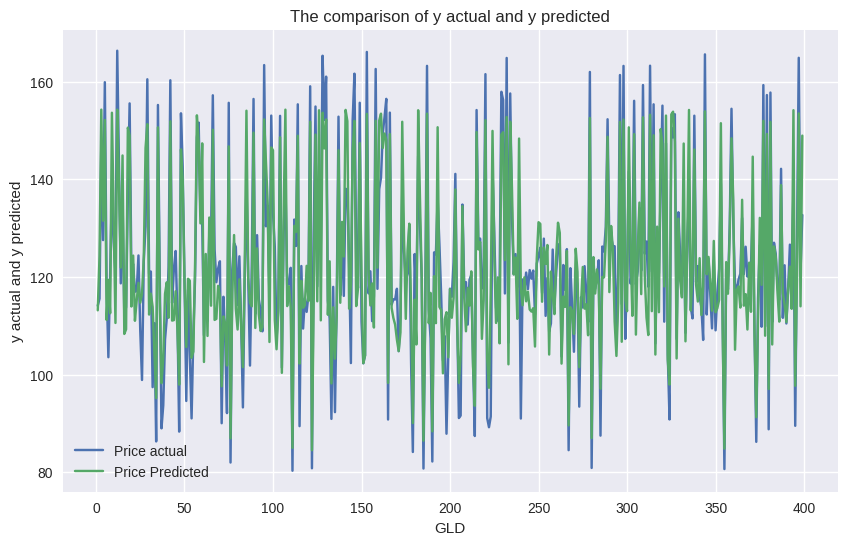

In [ ]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(np.arange(1,X_test_quadrat.shape[0]+1,1), prediksi_quadrat['Y Actual'], label='Price actual')
ax.plot(np.arange(1,X_test_quadrat.shape[0]+1,1), prediksi_quadrat['Y Predicted'], label='Price Predicted')
ax.set_title('The comparison of y actual and y predicted')
ax.set_ylabel('y actual and y predicted')
ax.set_xlabel('GLD')
ax.legend()

plt.show()

# Multivariable

In [ ]:
X_train_mult, X_test_mult, y_train_mult, y_test_mult = train_test_split(X_mult,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=50,
                                                    )

In [ ]:
X_train_mult.shape

(1595, 4)

In [ ]:
X_test_mult.shape

(399, 4)

### Data Training

In [ ]:
regressor_mult = LinearRegression()
regressor_mult.fit(X_train_mult, y_train_mult)

LinearRegression()

In [ ]:
intercept=regressor_mult.intercept_
intercept

122.81417704795611

In [ ]:
coef=regressor_mult.coef_
coef

array([ 4.98269239,  0.0597284 , 18.77564371, -2.05144249])

In [ ]:
coeff_mult = pd.DataFrame(coef.reshape(-1,1),
                        mult_column,
                        columns=['Slope']
                        )
coeff_mult.sort_values('Slope')

,Slope
EUR/USD,-2.051442
USO,0.059728
SPX,4.982692
SLV,18.775644


### Data Testing

In [ ]:
y_pred_train_mult = regressor_mult.predict(X_train_mult)
y_pred_test_mult = regressor_mult.predict(X_test_mult)

In [ ]:
regressor_mult.score(X_train_mult, y_train_mult)

0.853157291710249

In [ ]:
regressor_mult.score(X_test_mult, y_test_mult)

0.8444564178520869

### Metrics Error

Train

In [ ]:
print('Mean Absolute Error(MAE): ', metrics.mean_absolute_error(y_train_mult, y_pred_train_mult))
print('Mean Squared Error(MSE): ', metrics.mean_squared_error(y_train_mult, y_pred_train_mult))
print('Root Mean Squared Error(RMSE): ', np.sqrt(metrics.mean_squared_error(y_train_mult, y_pred_train_mult)))
print('Max Error: ', round(metrics.max_error(y_train_mult, y_pred_train_mult)))
print('R2 Score:',round(metrics.r2_score(y_train_mult, y_pred_train_mult), 5))

Mean Absolute Error(MAE):  5.448217519592641
Mean Squared Error(MSE):  53.57391229476163
Root Mean Squared Error(RMSE):  7.319420215752176
Max Error:  37
R2 Score: 0.85316


Test

In [ ]:
print('Mean Absolute Error(MAE): ', metrics.mean_absolute_error(y_test_mult, y_pred_test_mult))
print('Mean Squared Error(MSE): ', metrics.mean_squared_error(y_test_mult, y_pred_test_mult))
print('Root Mean Squared Error(RMSE): ', np.sqrt(metrics.mean_squared_error(y_test_mult, y_pred_test_mult)))
print('Max Error: ', round(metrics.max_error(y_test_mult, y_pred_test_mult)))
print('R2 Score:',round(metrics.r2_score(y_test_mult, y_pred_test_mult), 5))

Mean Absolute Error(MAE):  5.413084709570092
Mean Squared Error(MSE):  55.38227667392104
Root Mean Squared Error(RMSE):  7.441926946290257
Max Error:  34
R2 Score: 0.84446


### Comparison Result

In [ ]:
prediksi_mult=pd.DataFrame({'Y Actual': y_test_mult, 'Y Predicted': y_pred_test_mult})
prediksi_mult.head()

,Y Actual,Y Predicted
2033,114.12,121.573650
1311,115.57,119.716308
766,147.18,159.321400
1253,127.55,125.017776
1124,159.89,151.367369


<ipython-input-58-3de01d8f5778>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


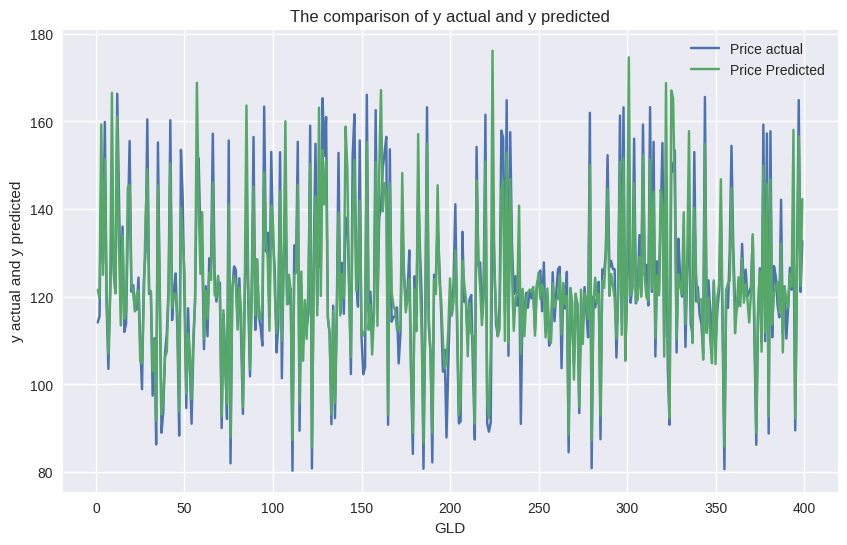

In [ ]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(np.arange(1,X_test_mult.shape[0]+1,1), prediksi_mult['Y Actual'], label='Price actual')
ax.plot(np.arange(1,X_test_mult.shape[0]+1,1), prediksi_mult['Y Predicted'], label='Price Predicted')
ax.set_title('The comparison of y actual and y predicted')
ax.set_ylabel('y actual and y predicted')
ax.set_xlabel('GLD')
ax.legend()

plt.show()